
# Project: NO SHOW APPOINTMENTS DATA ANALYSIS
### Why does any patient miss scheduled hospital appointments in the first place? 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#recommendation">Recommendation</a></li>
<li><a href="#limitation">Limitation</a></li>
</ul>

<a id='intro'></a>
## Introduction
This dataset is a collection of over 100,000 medical appointment information aimed at showing if a patient showed up for or missed his/her doctor's scheduled appointments. This data was gotten from hospitals in Brazil and contains several patient characteristics which i hope to generate insights from. 

There are 14 attributes which include
- Patient's id: This is the unique identifier of the patient
- Appointment id: This is the unique identifier of each appointment
- Gender: This indicates an individual's sex. Male or female
- Scheduled day: This indicates the day when an appointment date was set up
- Appointment day: This is the preset date for visiting the hospital to see a doctor
- Age: This shows the age of a patient
- Neighbourhood: This indicates the location of the hospital where the appointment is to take place
- Scholarship: This indicates if the patient is enrolled into the welfare program Bolsa Família.
- Hypertension: This indicates the presence or absence of hypertension
- Diabetes: This indicates the presence or absence of diabetes
- Alcoholism: This indicates the use of alcohol or not
- Handicap: This indicates the presence or absence of a disability
- Sms received: This identifies if the patient received an sms on his/her appointment or not
- No show: This indicates if a patient showed up for his/her appointment or not. No show? yes=did_not_show, no=showed 


Not showing up to hospital appointments is a fairly common occurence. This often negatively affects the use of hospital spaces and resources and in some cases, can negatively impact diagnosis and treatment.
Missing hospital appointments occurs in several countries and i hope to identify any present relationship between missing appointments and other factors such as age, gender, presesnce or absence of disease, poverty etc.
In Brazil, ‘Bolsa Família’ was a social welfare program which provided financial aid to the poor families in Brazil. This anti-poverty scheme was aimed at reducing poverty via education, healthcare and financial provisions. It contributed to a reduction of the high rate of poverty and high unemployment rate. The program formally ended on the 30th December, 2021.


## Analytical Questions
1. What proportion of individuals show up for hospital appointments compared to those who do not?
2. Do males miss hospital appointments more than females?
3. Is there a relationship between age and missing hospital appointments?
4. Is there a relationship between presence of disease and missing hospital appointments?
5. Is there a relationship between poverty and missing hospital appointments?



In [1]:
# Import python packages to be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline



<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
#load dataset
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

#preview the dataset
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
#lets get the shape of the dataset
df.shape

(110527, 14)

There are about 110,527 sample entries in this dataset with 14 distinct attributes or characteristics.




### Data Cleaning 

In [4]:
#looking at the different data types per column to ensure consistency
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

The data types seem consistent in columns, except for the scheduled day and appointment day which are registered as string objects. To properly analyze these attributes, they will need to be converted to datetime formats instead.

In [5]:
#Using pandas to_datetime function, convert the ScheduledDay column from string object to datetime.
#Infer datetime formats to ensure a mixture of formats doesnt get in the way of analysis.
df['ScheduledDay']= pd.to_datetime(df['ScheduledDay'], infer_datetime_format=True)
df['ScheduledDay'].head()

0   2016-04-29 18:38:08+00:00
1   2016-04-29 16:08:27+00:00
2   2016-04-29 16:19:04+00:00
3   2016-04-29 17:29:31+00:00
4   2016-04-29 16:07:23+00:00
Name: ScheduledDay, dtype: datetime64[ns, UTC]

In [6]:
#Using pandas to_datetime function, convert the AppointmentDay column from string object to datetime
#Infer datetime formats to ensure a mixture of formats doesnt get in the way of analysis.
df['AppointmentDay']= pd.to_datetime(df['AppointmentDay'], infer_datetime_format=True)
df['AppointmentDay'].head()

0   2016-04-29 00:00:00+00:00
1   2016-04-29 00:00:00+00:00
2   2016-04-29 00:00:00+00:00
3   2016-04-29 00:00:00+00:00
4   2016-04-29 00:00:00+00:00
Name: AppointmentDay, dtype: datetime64[ns, UTC]

The data type of both the ScheduledDay and AppointmentDay columns show that the conversion from string to datetime was successful.

The first five rows of the ScheduledDay and AppointmentDay columns show the format it retains after conversion.

In [7]:
#checking for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

In [8]:
#Confirm the absense of missing values
df.isnull().sum().any()

False

There are no missing values in this dataset as we can see complete 110527 non-null data in all columns 

In [9]:
#check for duplicates
df.duplicated().sum()

0

There are no duplicates in this dataset.

In [10]:
#summary description statistics for each column
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The minimum age seen from the summarry description is -1. This is impossible and definitely an error that needs to be corrected.

The maximum handicap value is also above 1. This is an error as the true or false values are represented by 1 or 0 only.

The maximum age value is too far away from the mean.

In [11]:
#check unique values in each column to further identify irregularities
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [12]:
#Ensure the min(-1) is the only faulty age value
unique_age= df['Age'].unique()
print(sorted(unique_age))

[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]


In [13]:
#Identify the row where age == -1
df.query('Age==-1')


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,No


In [14]:
#drop the row where age == -1
df.drop(99832, axis=0, inplace=True)

In [15]:
#Confirm correction of the -1 age
df['Age'].describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

The minimum value is now 0 and no longer -1. I have decided to leave the age values '0' because i assume that babies who are under 1 year of age may also need a doctor, and have hospital appointments booked with their pediatricians.

In [16]:
#Identify unique values in the handicap column
df['Handcap'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

The handicap column should indicate the presence or absence of a disability. This is to be represented as 0 for absence of disability and 1 for presence of disability. Since 2,3 and 4 are above zero, we will convert them to 1 to indicate presence of disability.

In [17]:
#Create a function to identify erring handicap values
def above_handicap():
    '''returns rows that meet the stated criteria'''
    y = df.query('Handcap >1')
    return y


In [18]:
#use query to identify faulty values.
above_handicap()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
946,7.282582e+13,5582483,M,2016-04-14 09:26:08+00:00,2016-04-29 00:00:00+00:00,94,BELA VISTA,0,1,1,0,2,1,No
1665,1.242919e+13,5525497,M,2016-03-30 09:16:41+00:00,2016-04-29 00:00:00+00:00,64,SANTA MARTHA,0,1,0,1,2,1,No
1666,1.242919e+13,5525498,M,2016-03-30 09:16:41+00:00,2016-04-29 00:00:00+00:00,64,SANTA MARTHA,0,1,0,1,2,0,No
2071,1.242919e+13,5640120,M,2016-04-29 10:08:48+00:00,2016-04-29 00:00:00+00:00,64,SANTA MARTHA,0,1,0,1,2,0,No
2091,1.491829e+13,5638626,F,2016-04-29 08:13:59+00:00,2016-04-29 00:00:00+00:00,11,ANDORINHAS,0,0,0,0,2,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108376,2.387212e+14,5756931,F,2016-06-01 08:48:28+00:00,2016-06-07 00:00:00+00:00,44,ROMÃO,0,1,1,0,2,1,No
109484,3.589495e+14,5752442,M,2016-05-31 11:45:57+00:00,2016-06-02 00:00:00+00:00,64,DA PENHA,0,1,1,0,2,0,No
109733,5.662976e+14,5772744,F,2016-06-03 16:11:00+00:00,2016-06-07 00:00:00+00:00,34,JUCUTUQUARA,0,0,0,0,2,1,No
109975,4.522185e+13,5766970,M,2016-06-02 16:07:36+00:00,2016-06-06 00:00:00+00:00,39,PRAIA DO SUÁ,1,0,0,0,2,1,No


In [19]:
# replace the numbers above 1 with 1 to simply indicate presence of a handicap

df['Handcap'].replace(2 ,1 ,inplace=True)
df['Handcap'].replace(3 ,1 ,inplace=True)
df['Handcap'].replace(4 ,1 ,inplace=True)

In [20]:
#To confirm that the values above 1 in the handicap column have been corrected, we call our above_handicap function 
above_handicap()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


<AxesSubplot:>

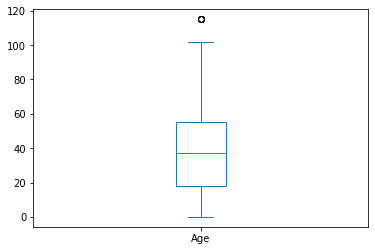

In [21]:
#check if the maximum age 115 is an outlier in this dataset using a boxplot
df['Age'].plot.box()

As suspected, 115 is an outlier and will be dropped. Dropping this row is important as age is one of the variables i am interested in. Also, dropping this single row will not have a significant impact on the overall analysis of this dataset.

In [22]:
#Identify rows with the age 115
df.query('Age == 115')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
63912,3.196321e+13,5700278,F,2016-05-16 09:17:44+00:00,2016-05-19 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,3.196321e+13,5700279,F,2016-05-16 09:17:44+00:00,2016-05-19 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,3.196321e+13,5562812,F,2016-04-08 14:29:17+00:00,2016-05-16 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,3.196321e+13,5744037,F,2016-05-30 09:44:51+00:00,2016-05-30 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,No
97666,7.482346e+14,5717451,F,2016-05-19 07:57:56+00:00,2016-06-03 00:00:00+00:00,115,SÃO JOSÉ,0,1,0,0,0,1,No


In [23]:
#Drop rows with 115 as their age.
df.drop(labels=[63912, 63915, 68127, 76284, 97666], axis=0, inplace=True)

In [24]:
#Confirm the absence of any rows with age 115
df.query('Age == 115')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [25]:
#confirm that all concerns have been addressed.
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105210e+05,1.105210e+05,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000
mean,1.474921e+14,5.675304e+06,37.085694,0.098271,0.197248,0.071869,0.030401,0.020240,0.321034
std,2.560928e+14,7.129576e+04,23.104606,0.297682,0.397923,0.258272,0.171690,0.140823,0.466876
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172457e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.172598e+13,5.680569e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,102.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
# change all column names to lowercase to make working with them easier
df.columns = df.columns.str.lower()

In [27]:
#confirm corrections
df.head(2)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [28]:
# correctly convert the column name 'handcap' to handicap, hipertension to hypertension and no-show to no_show
df.rename(columns={'handcap' : 'handicap', 'hipertension':'hypertension','no-show':'no_show'}, inplace=True)

In [29]:
#confirm corrections
df.head(2)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [30]:
# drop Columns That will not be used in this analysis.
df.drop(['patientid','appointmentid'],axis=1,inplace=True)

In [31]:
#confirm corrections
df.head(2)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [32]:
# replacing the values in the no_show column to did_not_show and showed_up

def replace_no_show(x,y):
    ''' replace values x with y in the no_show column'''
    z = df['no_show'].replace(x ,y ,inplace=True)
    return y



In [33]:
replace_no_show('No', 'showed')
replace_no_show('Yes', 'did_not_show')

'did_not_show'

In [34]:
#Confirm correction of the no_show column
df.head(7)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,showed
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,showed
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,showed
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,showed
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,showed
5,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,showed
6,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,did_not_show


### Summary
 - There were no missing values or duplicates in this dataset.
 - Scheduled day and Appointment day data was converted from string to datetime.
 - A row with -1 as its age variable was dropped.
 - All rows with a handicap value > 1 was converted to 1 to confirm presence of a disability.
 - The maximum age (115) was observed to be an outlier. 5 rows were affected and dropped.
 - All column names were converted to lowercase, misspelled names were corrected and columns not useful to this analysis were dropped.
 - All rows in the no_show column were renamed to showed and did_not_show to make it more explanatory and easily understood.
 

<a id='eda'></a>
## Exploratory Data Analysis



array([[<AxesSubplot:title={'center':'scheduledday'}>,
        <AxesSubplot:title={'center':'appointmentday'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'scholarship'}>,
        <AxesSubplot:title={'center':'hypertension'}>,
        <AxesSubplot:title={'center':'diabetes'}>],
       [<AxesSubplot:title={'center':'alcoholism'}>,
        <AxesSubplot:title={'center':'handicap'}>,
        <AxesSubplot:title={'center':'sms_received'}>]], dtype=object)

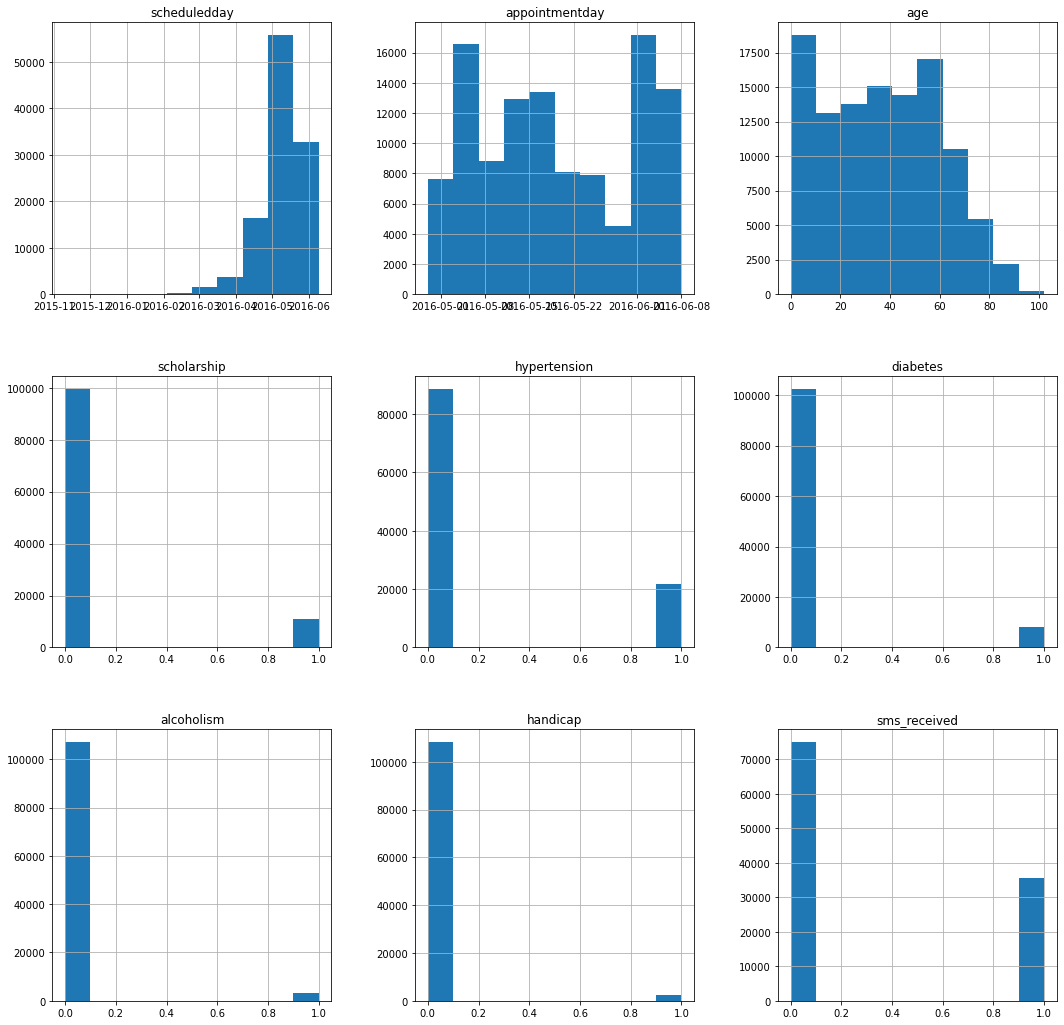

In [35]:
#To have a visual feel of the whole dataset, i visualize all rows in this dataset
df.hist(figsize=(18, 18))

We can observe that scheduled day and age are both skewed. Scheduled day is negatively skewed(left skewed) and age is positively skewed(right skewed)

### Research Question 1 (What proportion of individuals show up for hospital appointments compared to those who do not?)

In [36]:
#Generate the count for each value in the no_show column
df['no_show'].value_counts()

showed          88205
did_not_show    22316
Name: no_show, dtype: int64

In [37]:
#lets determine the overall value of individuals who showed up for appointments and those who did not

showed= df.query('no_show == "showed"').count()
did_not_show= df.query('no_show == "did_not_show"').count()

print((showed/len(df['no_show']))*100)

print((did_not_show/len(df['no_show']))*100)

gender            79.808362
scheduledday      79.808362
appointmentday    79.808362
age               79.808362
neighbourhood     79.808362
scholarship       79.808362
hypertension      79.808362
diabetes          79.808362
alcoholism        79.808362
handicap          79.808362
sms_received      79.808362
no_show           79.808362
dtype: float64
gender            20.191638
scheduledday      20.191638
appointmentday    20.191638
age               20.191638
neighbourhood     20.191638
scholarship       20.191638
hypertension      20.191638
diabetes          20.191638
alcoholism        20.191638
handicap          20.191638
sms_received      20.191638
no_show           20.191638
dtype: float64


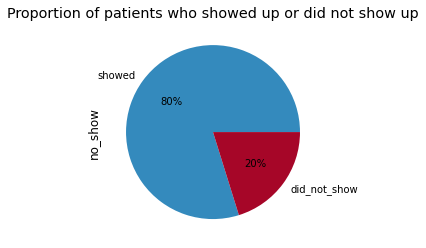

In [38]:
#Visualize the overall show and no_show rate of this dataset
plt.style.use('bmh')
df['no_show'].value_counts().plot(kind="pie",labels=['showed','did_not_show'],   autopct='%1.0f%%')

plt.title("Proportion of patients who showed up or did not show up");

 **We can see that about 80 percent of patients showed up while about 20 percent of patients did not show up for the scheduled appointment**

### Research Question 2  (Do males miss hospital appointments more than females?)

In [39]:
#Calculate the gender counts where f describes females and m represents males
gender_count = df['gender'].value_counts()
gender_count

F    71834
M    38687
Name: gender, dtype: int64

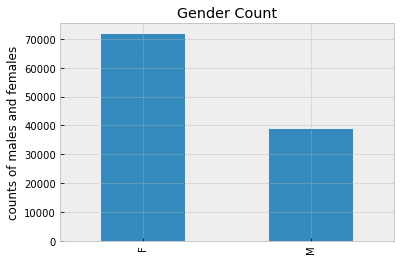

In [40]:
# Visualize the number of males and females in this dataset
gender_count.plot(kind="bar")
plt.title("Gender Count")
plt.ylabel('counts of males and females')
plt.show()

__There are more females in this dataset compared to the number of males__

In [41]:
#Identify the no_show rate by gender
df.groupby(['gender','no_show']).describe()

age                                               \
                       count       mean        std  min   25%   50%   75%   
gender no_show                                                              
F      did_not_show  14591.0  36.145980  21.156198  0.0  20.0  34.0  52.0   
       showed        57243.0  39.588491  22.338357  0.0  22.0  40.0  57.0   
M      did_not_show   7725.0  30.833010  22.972200  0.0  10.0  28.0  49.0   
       showed        30962.0  34.461372  24.734056  0.0  10.0  34.0  55.0   

                           scholarship            ... handicap       \
                       max       count      mean  ...      75%  max   
gender no_show                                    ...                 
F      did_not_show   98.0     14591.0  0.144336  ...      0.0  1.0   
       showed        102.0     57243.0  0.117866  ...      0.0  1.0   
M      did_not_show   97.0      7725.0  0.061100  ...      0.0  1.0   
       showed        100.0     30962.0  0.049609  ...      0.0  1.0   

                    sms_received                                               
                           count      mean       std  min  25%  50%  75%  max  
gender no_show                                                                 
F      did_not_show      14591.0  0.460558  0.498459  0.0  0.0  0.0  1.0  1.0  
       showed            57243.0  0.305382  0.460573  0.0  0.0  0.0  1.0  1.0  
M      did_not_show       7725.0  0.396634  0.489231  0.0  0.0  0.0  1.0  1.0  
       showed            30962.0  0.265358  0.441531  0.0  0.0  0.0  1.0  1.0  

[4 rows x 56 columns]

### Females
 Of the total **71,834** females, **14,591** did not show up for their appointments while **57,243** showed up.
### Males
 Of the total **38,687** males, **7,725** did not show up for their appointments whilw **30,962** showed up.

In [42]:
#using the showed and did_not_show variables defined earlier, lets get the proportion of each gender that did not show up.

dns_female = 14591

dns_male = 7725

total_female = 71834

total_male = 38687

dns_female_proportion = (dns_female/total_female) *100
dns_male_proportion = (dns_male / total_male) *100

print(dns_female_proportion)
print(dns_male_proportion)


20.31210847231116
19.967947889471915


 Analysis has shown that about 20.3 percent of females and 20.0 percent of males did not show up for hospital appointments. This shows that there is no significant difference between the rate at which both males and females miss hospital appointments.
Using the proportion of a particular population is important because it takes into consideration the fact that there are more females sampled in this dataset compared to males.

<AxesSubplot:>

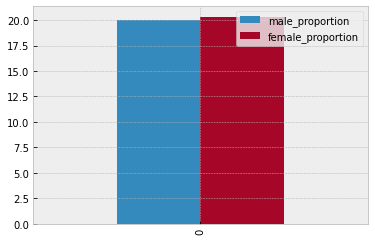

In [43]:
#Convert to dataframe and plot
pd.DataFrame({'male_proportion':dns_male_proportion, 'female_proportion':dns_female_proportion}, index=[0]).plot(kind='bar')

The bar chart backs up our analysis as we can see a very slight difference between both groups.

### Research Question 3  (Is there a relationship between age and missing hospital appointments?)

In [44]:
#Generate description statistics of the age column
df['age'].describe()

count    110521.000000
mean         37.085694
std          23.104606
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         102.000000
Name: age, dtype: float64

The mean age is 37.09 and the median, represented by the 50th percentile is 37. This backs up our earlier statement which stated that this data is skewed.

In [45]:
df['age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 100,  99], dtype=int64)

The different unique values in this column are too numerous. This will make analysis difficult. To deal with this, we will create another column called age group to classify these ages to categories to make analysis possible. 

In [46]:
# setting classes for new ranged age group column.
classes = [(df.age < 16), (df.age < 31 ), (df.age < 46), (df.age < 61), (df.age < 76 ), (df.age < 91), (df.age < 106)]

In [47]:
#set titles for each category.
values = ['0 - 15','16 - 30','31 - 45','46 - 60','61 - 75','76 - 90', '91 - 105']

In [48]:
#Create new column
df['age_group'] = np.select(classes, values)


In [49]:
#Confirm the successful creation of the age_group column
df.head(3)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,age_group
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,showed,61 - 75
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,showed,46 - 60
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,showed,61 - 75


<AxesSubplot:xlabel='Missed Hospital appointment by age group'>

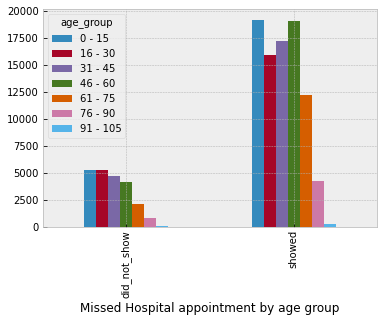

In [50]:
df.groupby(['no_show', 'age_group']).age_group.count().unstack().plot.bar(legend=True, xlabel='Missed Hospital appointment by age group')

In [51]:
#Get the sample size for each category
df['age_group'].value_counts()

0 - 15      24468
46 - 60     23179
31 - 45     21954
16 - 30     21163
61 - 75     14370
76 - 90      5084
91 - 105      303
Name: age_group, dtype: int64

We can see that the 91-105 class has the lowest show and no show rate compared to others. This is likely due to the low sample size for that category. For all age groups,there is a higher show rate compared to those who did not show up.
from the figure, if we compare show rates and no show rates per category, we wold notice that group 16-30 did not show up as much as other categories, having the overall group sample size in mind.

### Research Question 4  (Is there a relationship between presence of disease and missing hospital appointments?)

In [52]:
#Divide the dataset into those with or without hypertension
df['hypertension'].value_counts()

0    88721
1    21800
Name: hypertension, dtype: int64

In [53]:
#Group the data by hypertention status and no_show status
df.groupby(['no_show','hypertension']).hypertension.count()

no_show       hypertension
did_not_show  0               18544
              1                3772
showed        0               70177
              1               18028
Name: hypertension, dtype: int64

Text(0.5, 1.0, 'Proportion of patients with hypertension who showed up or did not show up')

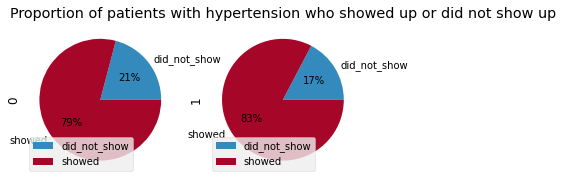

In [54]:
# use a pie chart to better visualize the relationship between hypertension and no_show.
df.groupby(['no_show','hypertension']).no_show.count().unstack().plot.pie(subplots=True, autopct='%1.0f%%')

plt.title("Proportion of patients with hypertension who showed up or did not show up")

<AxesSubplot:xlabel='Missed Hospital appointment'>

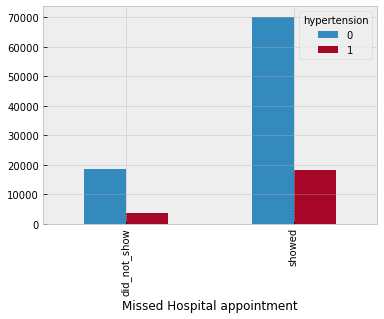

In [55]:
# plotting an unstacked bar chart of hypertension, diabetes, alcoholism and being handicapped
plt.style.use('bmh')
df.groupby(['no_show', 'hypertension']).hypertension.count().unstack().plot.bar(legend=True, xlabel='Missed Hospital appointment')

 **Most hypertensive patients (About 83%) showed up for their hospital appointment**
 
 A far higher population in this dataset did not have hypertension when compared to others who had the disease.

In [56]:
#Divide the dataset into those with or without diabetes
df['diabetes'].value_counts()

0    102578
1      7943
Name: diabetes, dtype: int64

In [57]:
#Group the data by diabetes status and no_show status
df.groupby(['no_show','diabetes']).diabetes.count()

no_show       diabetes
did_not_show  0           20886
              1            1430
showed        0           81692
              1            6513
Name: diabetes, dtype: int64

Text(0.5, 1.0, 'Proportion of patients with diabetes who showed up or did not show up')

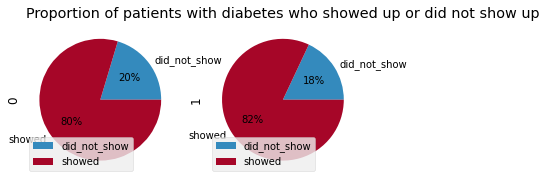

In [58]:
# use a pie chart to better visualize the relationship between diabetes and no_show.
df.groupby(['no_show','diabetes']).no_show.count().unstack().plot.pie(subplots=True, autopct='%1.0f%%')

plt.title("Proportion of patients with diabetes who showed up or did not show up")

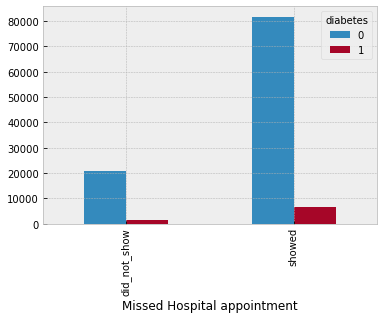

In [59]:
# plotting an unstacked bar chart of hypertension, diabetes, alcoholism and being handicapped
plt.style.use('bmh')
df.groupby(['no_show', 'diabetes']).diabetes.count().unstack().plot.bar(legend=True, xlabel='Missed Hospital appointment');

 **Most diabetic patients (About 82%) showed up for their hospital appointment**
 
 A far higher population in this dataset did not have diabetes when compared to others who had the disease.

In [60]:
#Divide the dataset into those who take or do not take alcohol
df['alcoholism'].value_counts()

0    107161
1      3360
Name: alcoholism, dtype: int64

In [61]:
#Group the data by alcoholism status and no_show status
df.groupby(['no_show','alcoholism']).alcoholism.count()

no_show       alcoholism
did_not_show  0             21639
              1               677
showed        0             85522
              1              2683
Name: alcoholism, dtype: int64

Text(0.5, 1.0, 'Proportion of patients taking alcohol who showed up or did not show up')

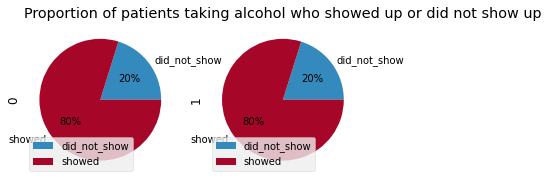

In [62]:
# use a pie chart to better visualize the relationship between alcoholism and no_show.
df.groupby(['no_show','alcoholism']).no_show.count().unstack().plot.pie(subplots=True, autopct='%1.0f%%')

plt.title("Proportion of patients taking alcohol who showed up or did not show up")

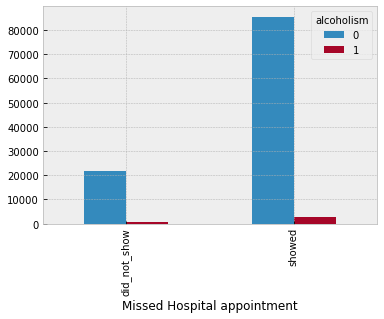

In [63]:
# plotting an unstacked bar chart of hypertension, diabetes, alcoholism and being handicapped
plt.style.use('bmh')
df.groupby(['no_show', 'alcoholism']).alcoholism.count().unstack().plot.bar(legend=True, xlabel='Missed Hospital appointment');

 **Most patients who took alcohol (About 80%) showed up for their hospital appointment**
    
 A far higher population in this dataset did not take alcohol.

In [64]:
#Divide the dataset into those with or without disability
df['handicap'].value_counts()

0    108284
1      2237
Name: handicap, dtype: int64

In [65]:
#Group the data by disability status and no_show status
df.groupby(['no_show','handicap']).handicap.count()

no_show       handicap
did_not_show  0           21912
              1             404
showed        0           86372
              1            1833
Name: handicap, dtype: int64

Text(0.5, 1.0, 'Proportion of patients with a disability who showed up or did not show up')

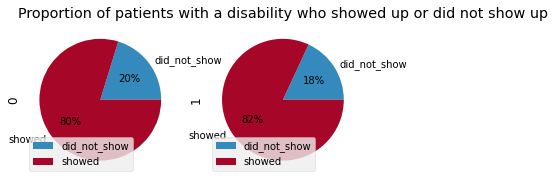

In [66]:
# use a pie chart to better visualize the relationship between being handicapped and no_show.
df.groupby(['no_show','handicap']).no_show.count().unstack().plot.pie(subplots=True, autopct='%1.0f%%')

plt.title("Proportion of patients with a disability who showed up or did not show up")

<AxesSubplot:xlabel='Missed Hospital appointment'>

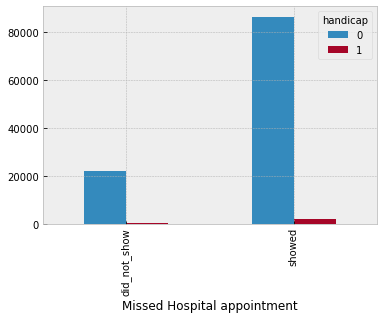

In [67]:
# plotting an unstacked bar chart of hypertension, diabetes, alcoholism and being handicapped
plt.style.use('bmh')
df.groupby(['no_show', 'handicap']).handicap.count().unstack().plot.bar(legend=True, xlabel='Missed Hospital appointment')

 **Most patients with a disability (About 82%) showed up for their hospital appointment**
 
 A far higher population in this dataset did not have any disability.

 __No significant link has been identified between the presence of a disease and missing hospital appointments. This is majorly due to the skewed nature of samples collected in this dataset.__

### Research Question 5  (Is there a relationship between poverty and missing hospital appointments?)

In [68]:
#Lets generate summary statistics for the scholarship column
df['scholarship'].describe()

count    110521.000000
mean          0.098271
std           0.297682
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: scholarship, dtype: float64

In [69]:
df['scholarship'].value_counts()

0    99660
1    10861
Name: scholarship, dtype: int64

In this column, 0 indicates not being enrolled into the Bosia Familia program while 1 indicates enrolment. From this dataset, we can see that a larger number of individuals in this dataset were not enrolled into the program. This also indicates that poorer individuals were not properly represented in this dataset.

In [70]:
df.groupby(['no_show','scholarship']).scholarship.count()

no_show       scholarship
did_not_show  0              19738
              1               2578
showed        0              79922
              1               8283
Name: scholarship, dtype: int64

We can see that about 25%(2578) of individuals enrolled in the scholarship program did not show up for their scheduled appointment. Though the percentage is lower compared to those who showed up, 2578 is a significant number of people.

<AxesSubplot:xlabel='Missed Hospital appointment'>

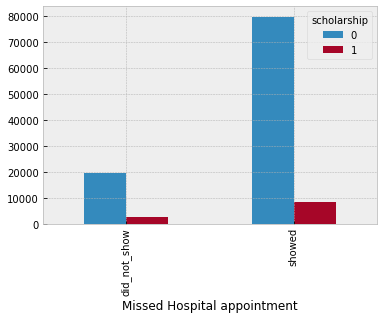

In [71]:
plt.style.use('bmh')
df.groupby(['no_show', 'scholarship']).scholarship.count().unstack().plot.bar(legend=True, xlabel='Missed Hospital appointment')

The bar chart shows a visual summary of my findings. 

<a id='conclusions'></a>
## Conclusions

* About 80 percent of patients showed up while about 20 percent of patients did not show up for their scheduled appointment
* There is no significant difference between the rate at which both males and females miss hospital appointments.
* There is no significant relationship between age and missing hospital appointments. However, the age group 16-30 did not show up as much as other categories
* Most hypertensive, diabetic, handicapped and patients who take alcohol did not miss their hospital appointments.
* About 25% of poor people did not show up for their scheduled appointment.



<a id='recommendation'></a>
## Recommendation
* Further statistical testing is required to determine correlation, causation and statistical conclusion.
* To ensure the carrying out of standardized analysis, the dataset should correctly represent the different categories to be analyzed.

<a id='limitation'></a>
## Limitation

* The data was not collected in a representative manner for most categories
* The values in the scheduled day and appointment day columns were not properly entered, making it impossible to answer questions on those columns.
* The categorical nature of data of most of our columns in this dataset made calculation of correlation difficult
* This study was limited to descriptive analysis as statistical tests were not carried out